In [89]:
import gym
import numpy as np
import matplotlib.pyplot as plt


env = gym.make('NChain-v0')
Q = np.zeros((5, 2))
lr = 0.01
gamma = 0.6
epsilon = 0.3



In [112]:
def run_policy():
    s = env.reset()
    cumulative_reward = 0

    done = False
    for i in range(100):
        action = max_action(s)
        s, reward, done, info = env.step(action)
        cumulative_reward += reward

    return cumulative_reward


def test_policy(n):
    return sum([run_policy() for i in range(n)]) / n


def max_action(s):
    return np.argmax(Q[s, :])


def choose_action(s):
    if np.random.random() < epsilon:
        return env.action_space.sample()
    else:
        return max_action(s)

In [117]:
def Q_learning():
    history = []
    for episodes in range(100):
        s = env.reset()

        for i in range(50):
            action = choose_action(s)
            s_next, reward, done, info = env.step(action)

            Q[s, action] = (1-lr)*Q[s, action] + lr*(reward + gamma*np.max(Q[s_next, :]))

            s = s_next
        history.append(test_policy(100))
    env.close()
    return history

In [118]:
def sarsa():
    history = []
    for episodes in range(100):
        s = env.reset()
        action = choose_action(s)

        for i in range(50):
            s_next, reward, done, info = env.step(action)

            action_next = choose_action(s_next)

            Q[s, action] += lr*(reward + gamma*(Q[s_next, action_next]) - Q[s,action])
            s = s_next
            action = action_next

        history.append(test_policy(100))
    env.close()
    return history

[[ 3.00312397  3.97726929]
 [ 3.0301495   3.91260721]
 [ 4.41171998  4.41171681]
 [ 7.63545747  4.69101194]
 [15.19073112  4.65935137]]


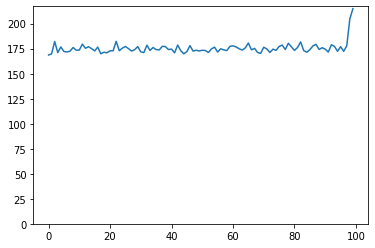

In [121]:
history = Q_learning()

print(Q)
plt.plot(history)
plt.ylim(0)
plt.show()

[[ 2.63766559  3.62975457]
 [ 2.76066464  3.97406433]
 [ 3.96517053  4.0663122 ]
 [ 7.21408273  4.55606611]
 [15.24917281  4.61074295]]


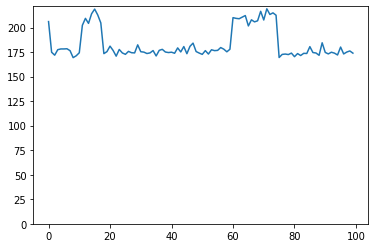

In [122]:
history = sarsa()

print(Q)
plt.plot(history)
plt.ylim(0)
plt.show()